In [2]:
pip install pandas matplotlib yfinance seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

In [4]:
# reading data from every stock in brazilian market
data = pd.read_csv('b3_stocks.csv')

In [5]:
#list of sectors
data['Setor'].unique()

array(['Comércio', 'Viagens e Lazer',
       'Serv.Méd.Hospit. Análises e Diagnósticos',
       'Material de Transporte', 'Máquinas e Equipamentos',
       'Intermediários Financeiros', 'Programas e Serviços',
       'Petróleo, Gás e Biocombustíveis', 'Serviços Financeiros Diversos',
       'Diversos', 'Mineração', 'Bebidas', 'Serviços Diversos',
       'Construção Civil', 'Energia Elétrica',
       'Tecidos, Vestuário e Calçados', 'Transporte',
       'Siderurgia e Metalurgia', 'Comércio e Distribuição',
       'Computadores e Equipamentos', 'Alimentos Processados',
       'Produtos de Uso Pessoal e de Limpeza', 'Holdings Diversificadas',
       'Telecomunicações', 'Água e Saneamento', 'Madeira e Papel',
       'Previdência e Seguros', 'Químicos', 'Construção e Engenharia',
       'Exploração de Imóveis', 'Hoteis e Restaurantes', 'Agropecuária',
       'Automóveis e Motocicletas', 'Mídia', 'Utilidades Domésticas',
       'Medicamentos e Outros Produtos', '0', 'Outros',
       'Materia

In [6]:
#list of subsectors
data['Subsetor'].unique()

array(['Eletrodomésticos', 'Viagens e Turismo',
       'Serv.Méd.Hospit. Análises e Diagnósticos',
       'Material Aeronáutico e de Defesa', 'Máq. e Equip. Industriais',
       'Bancos', 'Programas e Serviços',
       'Exploração, Refino e Distribuição',
       'Serviços Financeiros Diversos', 'Aluguel de carros',
       'Tecidos, Vestuário e Calçados', 'Minerais Metálicos',
       'Cervejas e Refrigerantes', 'Produtos Diversos',
       'Serviços Educacionais', 'Serviços Diversos', 'Incorporações',
       'Energia Elétrica', 'Material Rodoviário', 'Calçados',
       'Transporte Aéreo', 'Siderurgia', 'Medicamentos e Outros Produtos',
       'Computadores e Equipamentos', 'Carnes e Derivados',
       'Produtos de Uso Pessoal', 'Alimentos', 'Transporte Ferroviário',
       'Holdings Diversificadas', 'Telecomunicações',
       'Motores, Compressores e Outros', 'Exploração de Rodovias',
       'Acessórios', 'Serviços de Apoio e Armazenagem',
       'Alimentos Diversos', 'Transporte Hidrovi

In [7]:
# turn dividend yield to numbers and filtering to greather than 6
data = data[data['Div. Yield'].str.len() < 7]
data['Div. Yield'] = data['Div. Yield'].str.replace('%', '').str.replace(',', '.')
data['Div. Yield'] = pd.to_numeric(data['Div. Yield'])
data = data[data['Div. Yield'] >= 6]

# turn P/L to numbers and filtering from 0 to 15
data['P/L'] = pd.to_numeric(data['P/L'].str.replace(',', '.'))
data = data[data['P/L'] <= 15]
data = data[data['P/L'] >= 0]

# removing zero numbers
data = data[data['Valor de mercado'] != '0']

# filtering favorite sectors
subsctors = ['Minerais Metálicos','Energia Elétrica', 'Bancos', 'Água e Saneamento', 'Agricultura','Madeira']
data = data[data['Subsetor'].isin(subsctors)]

# setting stock name as datatable index
data = data.drop('Unnamed: 0', axis=1)
data.set_index('nome')

,Tipo,Empresa,Setor,Subsetor,Cotação,Valor de mercado,Valor da firma,P/L,P/VP,P/EBIT,...,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Patrim. Líq
nome,,,,,,,,,,,,,,,,,,,,,
VALE3,ON NM,VALE ON NM,Mineração,Minerais Metálicos,"77,20",350.411.000.000,400.532.000.000,7.37,"1,84","4,38",...,"38,8%","23,3%","17,9%","20,1%","25,0%","1,08","0,37","0,46","0,79",190.172.000.000
BBDC4,PN N1,BANCO BRADESCO S.A. PN N1,Intermediários Financeiros,Bancos,"17,09",181.875.000.000,-,12.24,"1,13",-,...,-,"0,0%","0,0%",-,"9,2%",-,-,-,-,160.801.000.000
TRPL4,PN N1,TRANSMISSÃO PAULISTA PN N1,Energia Elétrica,Energia Elétrica,"26,50",17.460.400.000,24.678.000.000,7.39,"0,97","5,52",...,"54,9%","41,9%","9,0%","9,5%","13,1%","1,90","0,50","0,16","0,50",17.977.200.000
CMIG4,PN N1,CEMIG PN N1,Energia Elétrica,Energia Elétrica,"11,48",25.271.700.000,33.209.600.000,4.78,"1,03","3,07",...,"22,8%","14,7%","14,7%","16,7%","21,6%","1,30","0,50","0,64","0,45",24.427.800.000
BBAS3,ON,BANCO DO BRASIL S.A. ON,Intermediários Financeiros,Bancos,"55,39",158.715.000.000,-,4.75,"0,99",-,...,-,"0,0%","0,0%",-,"20,8%",-,-,-,-,160.489.000.000
CMIN3,ON N2,CSNMINERACAO ON N2,Mineração,Minerais Metálicos,"7,83",42.950.200.000,40.764.100.000,13.94,"3,75","7,33",...,"33,8%","17,8%","19,8%","33,7%","26,9%","2,96","0,74","0,59","1,45",11.444.200.000
AURE3,ON NM,AUREN ON NM,Energia Elétrica,Energia Elétrica,"13,31",13.310.000.000,14.617.900.000,6.56,"0,95","15,46",...,"14,4%","34,0%","2,8%","3,4%","14,5%","1,92","0,44","0,19","0,43",13.962.400.000
BBDC3,ON N1,BANCO BRADESCO S.A. ON N1,Intermediários Financeiros,Bancos,"15,28",162.612.000.000,-,10.95,"1,01",-,...,-,"0,0%","0,0%",-,"9,2%",-,-,-,-,160.801.000.000
SAPR4,PN,SANEPAR PN,Água e Saneamento,Água e Saneamento,"5,89",8.901.000.000,13.302.200.000,5.98,"0,94","3,36",...,"43,6%","24,5%","14,5%","15,9%","15,7%","1,41","0,60","0,33","0,49",9.497.430.000


In [9]:
# description of the data
data.describe()

,P/L,Div. Yield
count,51.000000,51.000000
mean,7.596667,9.929412
std,2.404768,3.272937
min,4.150000,6.100000
25%,6.005000,7.350000
50%,7.150000,9.600000
75%,8.795000,11.350000
max,13.940000,22.500000


In [10]:
# sample of the first registers
data.head()

,nome,Tipo,Empresa,Setor,Subsetor,Cotação,Valor de mercado,Valor da firma,P/L,P/VP,...,Marg. EBIT,Marg. Líquida,EBIT / Ativo,ROIC,ROE,Liquidez Corr,Div Br/ Patrim,Giro Ativos,Ativo,Patrim. Líq
12,VALE3,ON NM,VALE ON NM,Mineração,Minerais Metálicos,"77,20",350.411.000.000,400.532.000.000,7.37,"1,84",...,"38,8%","23,3%","17,9%","20,1%","25,0%","1,08","0,37","0,46","0,79",190.172.000.000
16,BBDC4,PN N1,BANCO BRADESCO S.A. PN N1,Intermediários Financeiros,Bancos,"17,09",181.875.000.000,-,12.24,"1,13",...,-,"0,0%","0,0%",-,"9,2%",-,-,-,-,160.801.000.000
22,TRPL4,PN N1,TRANSMISSÃO PAULISTA PN N1,Energia Elétrica,Energia Elétrica,"26,50",17.460.400.000,24.678.000.000,7.39,"0,97",...,"54,9%","41,9%","9,0%","9,5%","13,1%","1,90","0,50","0,16","0,50",17.977.200.000
30,CMIG4,PN N1,CEMIG PN N1,Energia Elétrica,Energia Elétrica,"11,48",25.271.700.000,33.209.600.000,4.78,"1,03",...,"22,8%","14,7%","14,7%","16,7%","21,6%","1,30","0,50","0,64","0,45",24.427.800.000
44,BBAS3,ON,BANCO DO BRASIL S.A. ON,Intermediários Financeiros,Bancos,"55,39",158.715.000.000,-,4.75,"0,99",...,-,"0,0%","0,0%",-,"20,8%",-,-,-,-,160.489.000.000


<Axes: xlabel='P/L', ylabel='Div. Yield'>

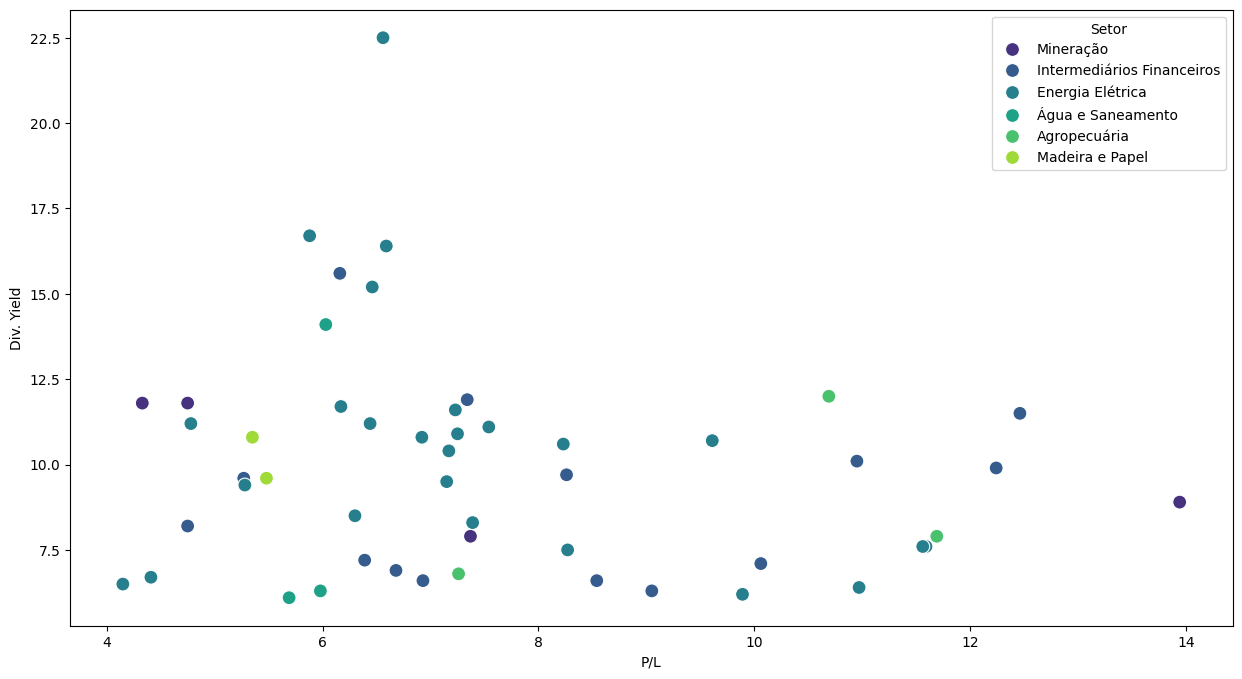

In [11]:
# plot relationship dividends x P/L
plt.figure(figsize=(15,8))
sns.scatterplot(y='Div. Yield', x='P/L', data=data, hue='Setor', palette='viridis', s=100)

In [12]:
# create a new dataframe with the relevant information and order it
data = data.sort_values(by=['Setor','Subsetor','Div. Yield'], ascending=[False,False,False])
data = data[['nome','Setor','Subsetor','Div. Yield','P/L']]

In [13]:
data

,nome,Setor,Subsetor,Div. Yield,P/L
153,CSMG3,Água e Saneamento,Água e Saneamento,14.1,6.03
113,SAPR4,Água e Saneamento,Água e Saneamento,6.3,5.98
206,SAPR3,Água e Saneamento,Água e Saneamento,6.1,5.69
144,BRAP4,Mineração,Minerais Metálicos,11.8,4.75
266,BRAP3,Mineração,Minerais Metálicos,11.8,4.33
45,CMIN3,Mineração,Minerais Metálicos,8.9,13.94
12,VALE3,Mineração,Minerais Metálicos,7.9,7.37
222,EUCA4,Madeira e Papel,Madeira,10.8,5.35
345,EUCA3,Madeira e Papel,Madeira,9.6,5.48
335,BGIP4,Intermediários Financeiros,Bancos,15.6,6.16


In [14]:
# create a new collumn for search in yahoo api
data['yahoo_name'] = data['nome'] + '.SA'

In [15]:
# take price historic data from yahoo api and save in a a csv file
yf.download(data['yahoo_name'].tolist(), start = "2016-01-01", end = "2023-12-30").to_csv('yahoo_stocks.csv')

[*********************100%%**********************]  51 of 51 completed


In [16]:
# read and format the data from yahoo api
stocks = pd.read_csv('yahoo_stocks.csv', header=[0,1],index_col=[0],parse_dates=[0])

In [17]:
#view head register samples
stocks.head()

Adj Close                                                   \
            AGRO3.SA AURE3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  BEES3.SA   
Date                                                                    
2016-01-04  6.090032      NaN  9.237390  6.566451  6.181680  0.983100   
2016-01-05  6.112278      NaN  9.269830  6.617611  6.204146  0.988717   
2016-01-06  6.062224      NaN  9.269830  6.500482  6.116217  0.977482   
2016-01-07  6.006607      NaN  9.049271  6.292261  5.992455  0.960629   
2016-01-08  6.073347      NaN  9.049271  6.279251  5.875212  1.011189   

                                                    ...   Volume           \
            BEES4.SA  BGIP3.SA  BGIP4.SA  BMEB3.SA  ... LAND3.SA REDE3.SA   
Date                                                ...                     
2016-01-04  1.033370  8.921134  6.653836  2.583771  ...      NaN        0   
2016-01-05  1.033370  8.921134  6.653836  2.583771  ...      NaN     1471   
2016-01-06  1.033370  8.921134  6.653836  2.583771  ...      NaN        0   
2016-01-07  1.033370  8.921134  6.653836  2.214661  ...      NaN        0   
2016-01-08  1.015954  8.921134  6.481396  2.214661  ...      NaN        0   

                                                                           \
           SAPR3.SA SAPR4.SA SLCE3.SA TAEE3.SA TAEE4.SA TRPL3.SA TRPL4.SA   
Date                                                                        
2016-01-04     1200   188400   758428        0      NaN        0  1501141   
2016-01-05        0   236100   800536        0      NaN        0  2739213   
2016-01-06        0  1029000   681472        0      NaN        0  1891542   
2016-01-07        0   228900   732776        0      NaN        0  1892343   
2016-01-08        0    83400   756008        0      NaN        0   946572   

                     
           VALE3.SA  
Date                 
2016-01-04  4587900  
2016-01-05  2693500  
2016-01-06  6758900  
2016-01-07  6450400  
2016-01-08  4429400  

[5 rows x 306 columns]

In [18]:
# extract the closing prices of the stocks
close = stocks.loc[:,'Close'].copy()
ret = close.pct_change().dropna()

C:\Users\Home\AppData\Local\Temp\ipykernel_7212\438090613.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret = close.pct_change().dropna()


In [19]:
# describe the data
ret.describe()

,AGRO3.SA,AURE3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BEES3.SA,BEES4.SA,BGIP3.SA,BGIP4.SA,BMEB3.SA,...,LAND3.SA,REDE3.SA,SAPR3.SA,SAPR4.SA,SLCE3.SA,TAEE3.SA,TAEE4.SA,TRPL3.SA,TRPL4.SA,VALE3.SA
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,-0.000157,-0.000340,0.001221,-0.000040,-0.000179,0.001553,0.001505,-0.000038,0.000636,0.001663,...,-0.000841,0.000582,0.000910,0.000965,-0.000088,-0.000262,-0.000230,0.000152,0.000068,-0.000272
std,0.022165,0.016404,0.018541,0.017465,0.019623,0.012862,0.018722,0.020697,0.036240,0.036302,...,0.017729,0.034160,0.017531,0.016176,0.019682,0.012273,0.012082,0.015625,0.013776,0.020525
min,-0.186879,-0.109176,-0.100269,-0.160127,-0.173843,-0.059783,-0.081897,-0.145455,-0.365667,-0.158076,...,-0.085000,-0.104425,-0.069164,-0.054795,-0.067973,-0.092715,-0.099469,-0.082143,-0.094857,-0.066621
25%,-0.009741,-0.007719,-0.007454,-0.009259,-0.010168,-0.003683,-0.005920,0.000000,-0.006445,-0.000844,...,-0.009674,-0.009812,-0.008982,-0.007802,-0.010626,-0.005270,-0.005231,-0.007683,-0.006106,-0.012287
50%,-0.000391,0.000000,0.001034,0.000803,0.000000,0.001146,0.000000,0.000000,0.000000,0.000000,...,-0.000467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000825,0.000000,-0.000385,0.000000
75%,0.013792,0.008032,0.011424,0.009861,0.010514,0.007544,0.007878,0.000000,0.006447,0.000000,...,0.007059,0.007661,0.009246,0.009195,0.010888,0.006707,0.005841,0.008674,0.006915,0.010591
max,0.071640,0.093172,0.076324,0.066217,0.069052,0.072727,0.169245,0.241961,0.452894,0.298932,...,0.081848,0.458333,0.141509,0.127168,0.070567,0.030514,0.044228,0.055046,0.075743,0.103957


In [20]:
# extract the standard deviation and multiply it by the square root of the number of trading days in a year (252) to annualize it
summary = ret.describe().T.loc[:, ['std']]
summary['std'] = summary['std']*np.sqrt(252)

In [21]:
# view the head samples
summary.head()

,std
AGRO3.SA,0.351852
AURE3.SA,0.260398
BBAS3.SA,0.294332
BBDC3.SA,0.277255
BBDC4.SA,0.311513


In [22]:
summary['std']

AGRO3.SA     0.351852
AURE3.SA     0.260398
BBAS3.SA     0.294332
BBDC3.SA     0.277255
BBDC4.SA     0.311513
BEES3.SA     0.204176
BEES4.SA     0.297205
BGIP3.SA     0.328555
BGIP4.SA     0.575294
BMEB3.SA     0.576284
BMEB4.SA     0.284257
BMGB4.SA     0.374057
BMIN3.SA     0.440974
BMIN4.SA     0.350420
BRAP3.SA     0.322946
BRAP4.SA     0.315596
BRSR3.SA     0.265884
BRSR6.SA     0.284594
CEBR3.SA     0.450748
CEBR5.SA     0.458604
CEBR6.SA     0.408167
CEEB3.SA     0.258505
CEEB5.SA     0.474327
CLSC3.SA     0.240256
CLSC4.SA     0.272220
CMIG3.SA     0.364997
CMIG4.SA     0.306284
CMIN3.SA     0.423564
CPFE3.SA     0.283507
CSMG3.SA     0.365804
CSRN3.SA     0.501470
CSRN5.SA     0.504615
CSRN6.SA     0.484582
EGIE3.SA     0.188439
EKTR3.SA     0.306207
EKTR4.SA     0.474395
EQMA3B.SA    0.365422
EUCA3.SA     0.552546
EUCA4.SA     0.490342
GEPA3.SA     0.373042
GEPA4.SA     0.261859
LAND3.SA     0.281440
REDE3.SA     0.542276
SAPR3.SA     0.278298
SAPR4.SA     0.256779
SLCE3.SA  

In [23]:
# add standard deviation to its stocks
financial_data = data.merge(summary[['std']], left_on='yahoo_name', right_index=True, how='left')
financial_data = financial_data.sort_values(by=['Setor','Subsetor','std','Div. Yield'], ascending=[False,False,True,False])

In [24]:
financial_data

,nome,Setor,Subsetor,Div. Yield,P/L,yahoo_name,std
113,SAPR4,Água e Saneamento,Água e Saneamento,6.3,5.98,SAPR4.SA,0.256779
206,SAPR3,Água e Saneamento,Água e Saneamento,6.1,5.69,SAPR3.SA,0.278298
153,CSMG3,Água e Saneamento,Água e Saneamento,14.1,6.03,CSMG3.SA,0.365804
144,BRAP4,Mineração,Minerais Metálicos,11.8,4.75,BRAP4.SA,0.315596
266,BRAP3,Mineração,Minerais Metálicos,11.8,4.33,BRAP3.SA,0.322946
12,VALE3,Mineração,Minerais Metálicos,7.9,7.37,VALE3.SA,0.325831
45,CMIN3,Mineração,Minerais Metálicos,8.9,13.94,CMIN3.SA,0.423564
222,EUCA4,Madeira e Papel,Madeira,10.8,5.35,EUCA4.SA,0.490342
345,EUCA3,Madeira e Papel,Madeira,9.6,5.48,EUCA3.SA,0.552546
269,BEES3,Intermediários Financeiros,Bancos,6.6,8.54,BEES3.SA,0.204176


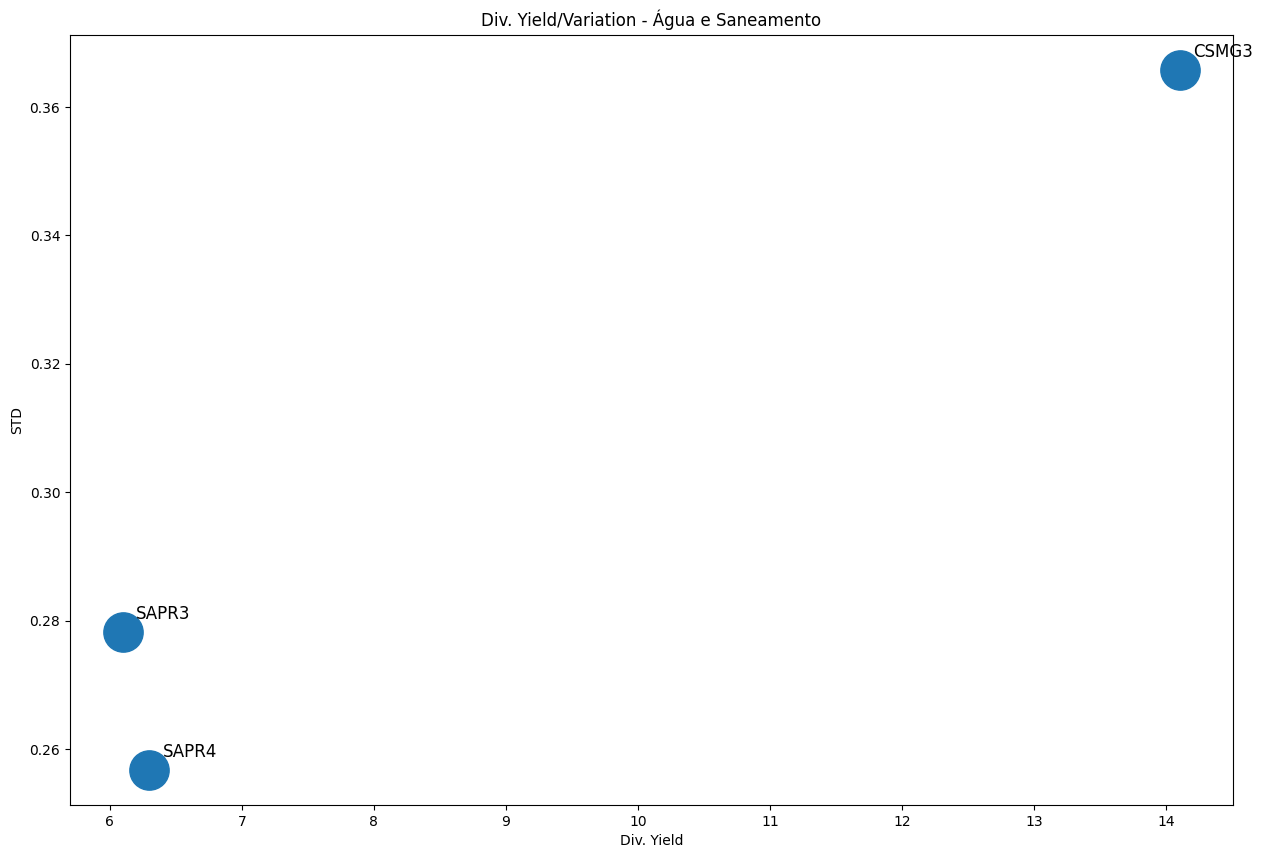

In [73]:
# plot the stocks by sector
financial_data_saneamento = financial_data[financial_data['Setor'] == 'Água e Saneamento']

# remove stocks with higher risk, above the mean of std
while(financial_data_saneamento['nome'].count() > 7):
    financial_data_saneamento = financial_data_saneamento[financial_data_saneamento['std'] < financial_data_saneamento['std'].mean()]

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(financial_data_saneamento['Div. Yield'], financial_data_saneamento['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Água e Saneamento')

for i in financial_data_saneamento.index:
    plt.annotate(financial_data_saneamento.loc[i, 'nome'], xy=(financial_data_saneamento.loc[i, 'Div. Yield'] + 0.1, financial_data_saneamento.loc[i, 'std'] + 0.002), size=12)

plt.show()

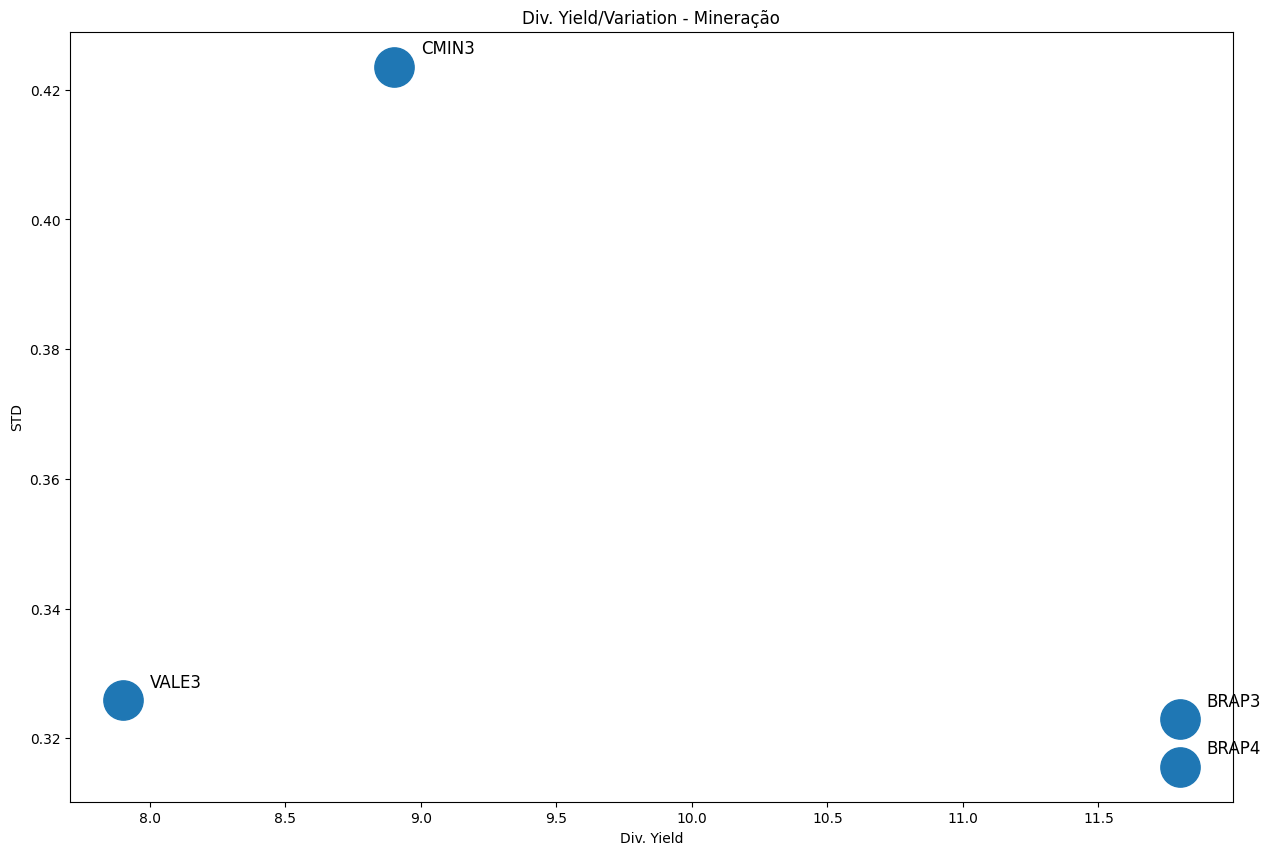

In [69]:
# plot the stocks by sector
financial_data_mineracao = financial_data[financial_data['Setor'] == 'Mineração']

# remove stocks with higher risk, above the mean of std
while(financial_data_mineracao['nome'].count() > 7):
    financial_data_mineracao = financial_data_mineracao[financial_data_mineracao['std'] < financial_data_mineracao['std'].mean()]

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(financial_data_mineracao['Div. Yield'], financial_data_mineracao['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Mineração')

for i in financial_data_mineracao.index:
    plt.annotate(financial_data_mineracao.loc[i, 'nome'], xy=(financial_data_mineracao.loc[i, 'Div. Yield'] + 0.1, financial_data_mineracao.loc[i, 'std'] + 0.002), size=12)

plt.show()

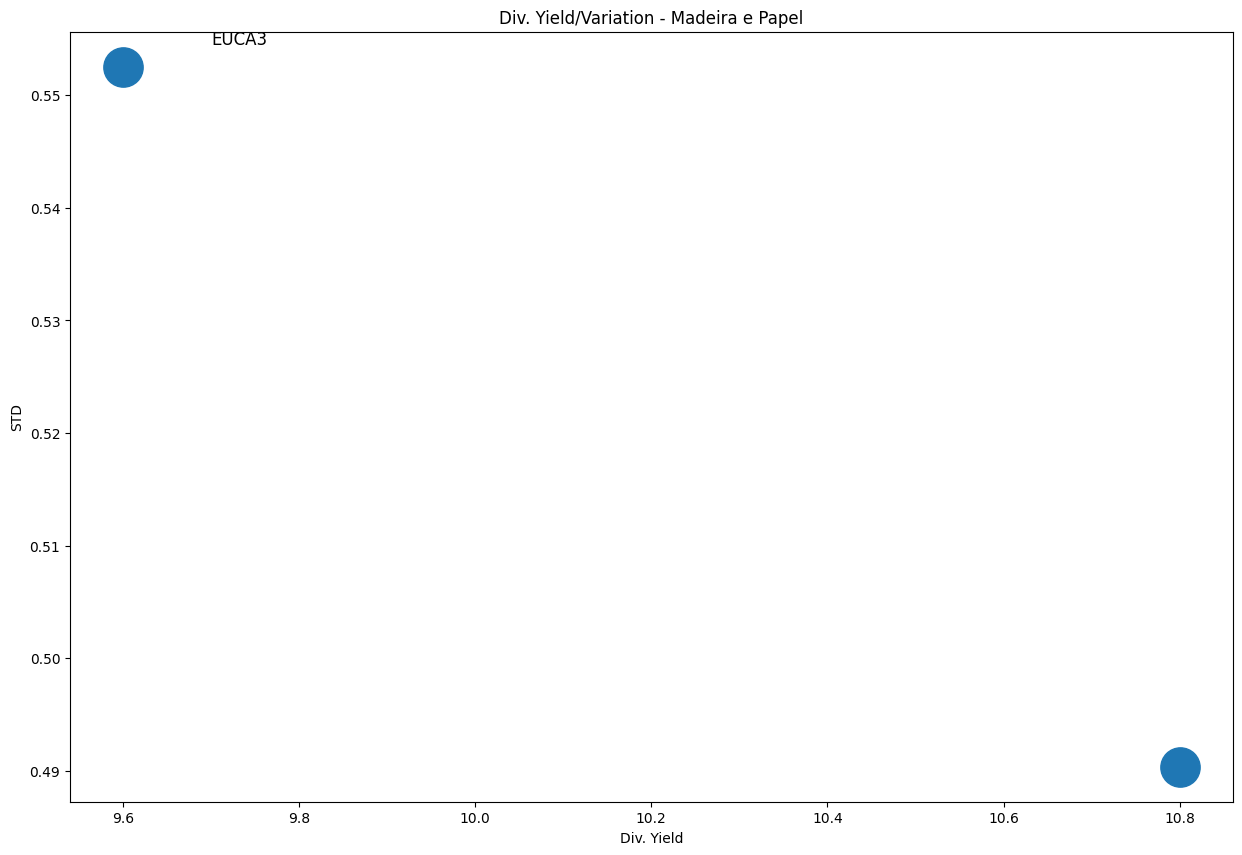

In [70]:
# plot the stocks by sector
financial_data_papel = financial_data[financial_data['Setor'] == 'Madeira e Papel']

# remove stocks with higher risk, above the mean of std
while(financial_data_papel['nome'].count() > 7):
    financial_data_papel = financial_data_papel[financial_data_papel['std'] < financial_data_papel['std'].mean()]

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(financial_data_papel['Div. Yield'], financial_data_papel['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Madeira e Papel')

for i in financial_data_papel.index:
    plt.annotate(financial_data_papel.loc[i, 'nome'], xy=(financial_data_papel.loc[i, 'Div. Yield'] + 0.1, financial_data_papel.loc[i, 'std'] + 0.002), size=12)

plt.show()

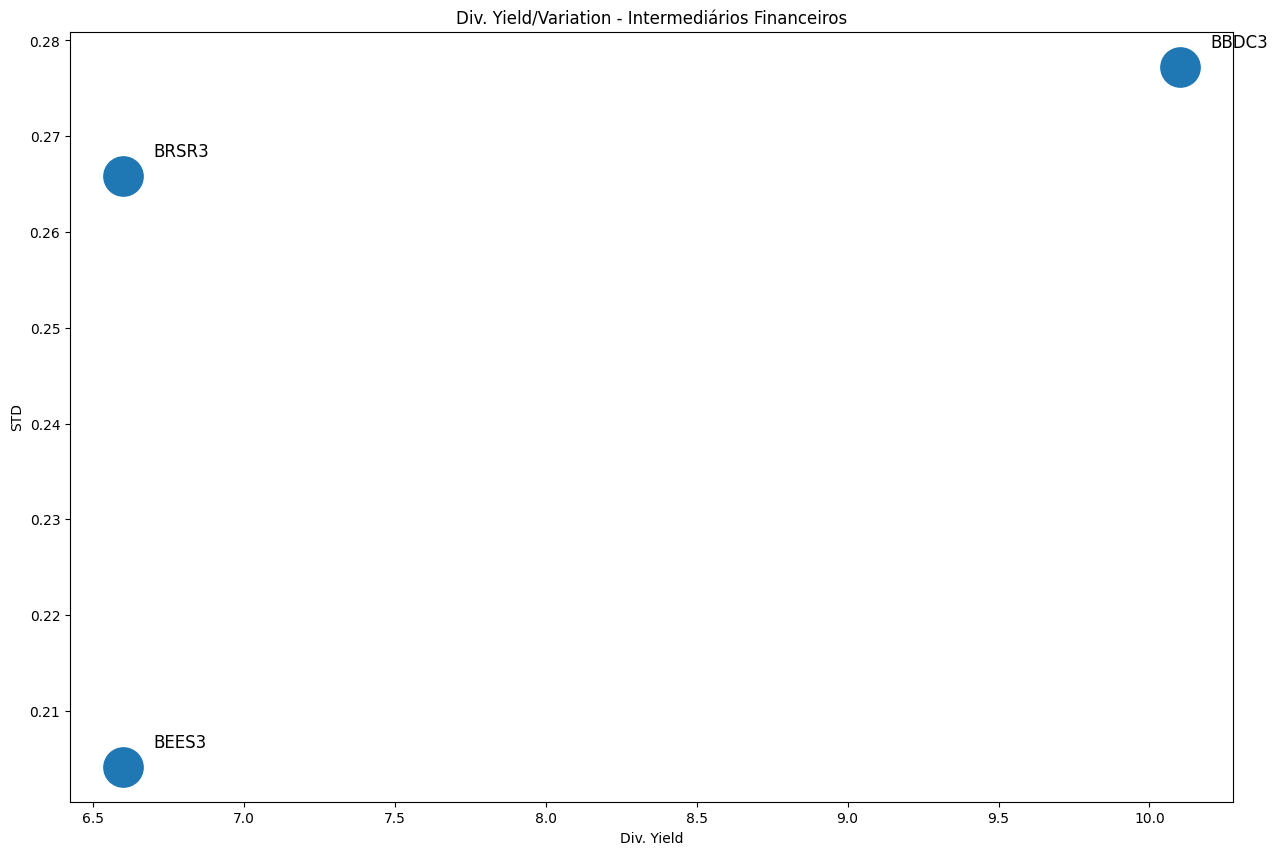

In [66]:
# plot the stocks by sector
financial_data_banco = financial_data[financial_data['Setor'] == 'Intermediários Financeiros']

# remove stocks with higher risk, above the mean of std
while(financial_data_banco['nome'].count() > 7):
    financial_data_banco = financial_data_banco[financial_data_banco['std'] < financial_data_banco['std'].mean()]

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(financial_data_banco['Div. Yield'], financial_data_banco['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Intermediários Financeiros')

for i in financial_data_banco.index:
    plt.annotate(financial_data_banco.loc[i, 'nome'], xy=(financial_data_banco.loc[i, 'Div. Yield'] + 0.1, financial_data_banco.loc[i, 'std'] + 0.002), size=12)

plt.show()

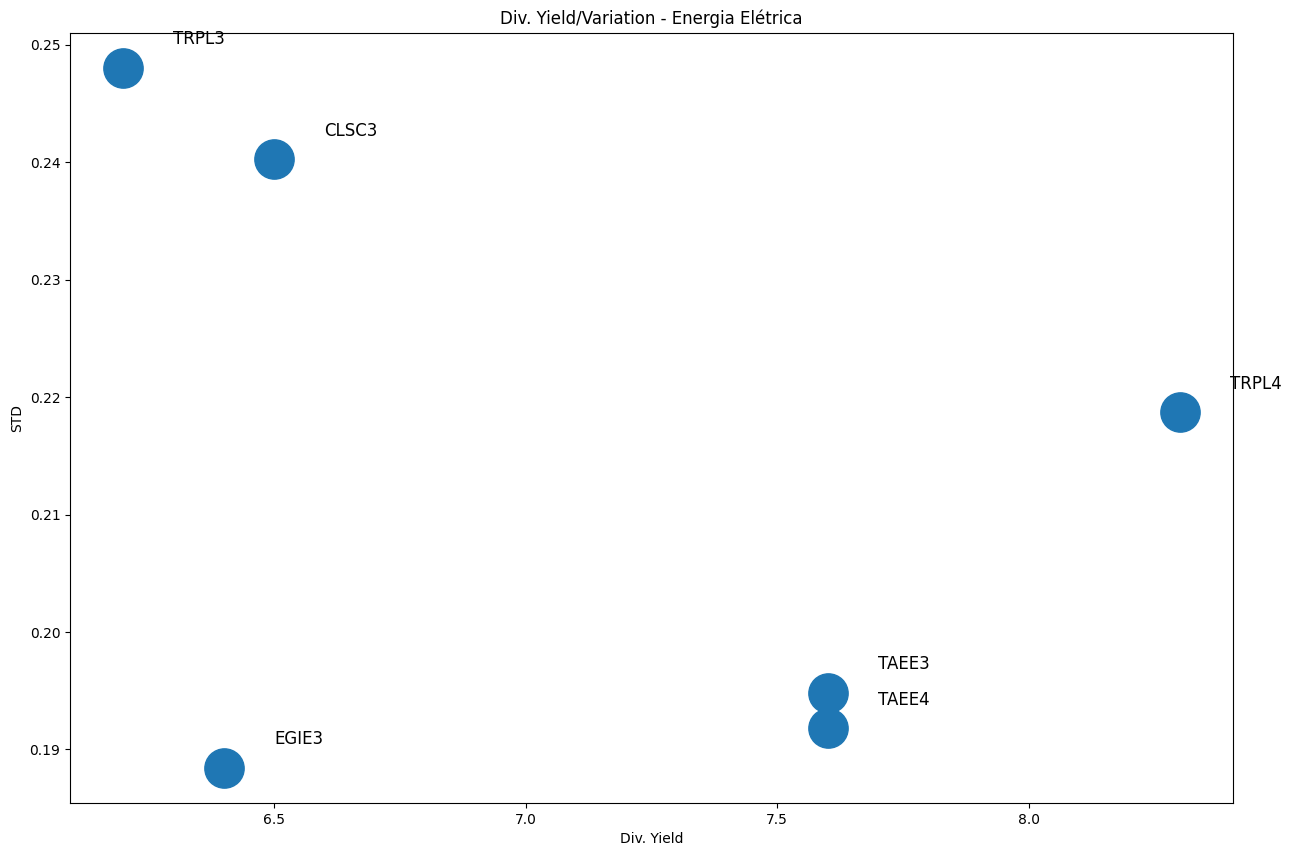

In [71]:
# plot the stocks by sector
financial_data_energia = financial_data[financial_data['Setor'] == 'Energia Elétrica']

# remove stocks with higher risk, above the mean of std
while(financial_data_energia['nome'].count() > 7):
    financial_data_energia = financial_data_energia[financial_data_energia['std'] < financial_data_energia['std'].mean()]

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(financial_data_energia['Div. Yield'], financial_data_energia['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Energia Elétrica')

for i in financial_data_energia.index:
    plt.annotate(financial_data_energia.loc[i, 'nome'], xy=(financial_data_energia.loc[i, 'Div. Yield'] + 0.1, financial_data_energia.loc[i, 'std'] + 0.002), size=12)

plt.show()

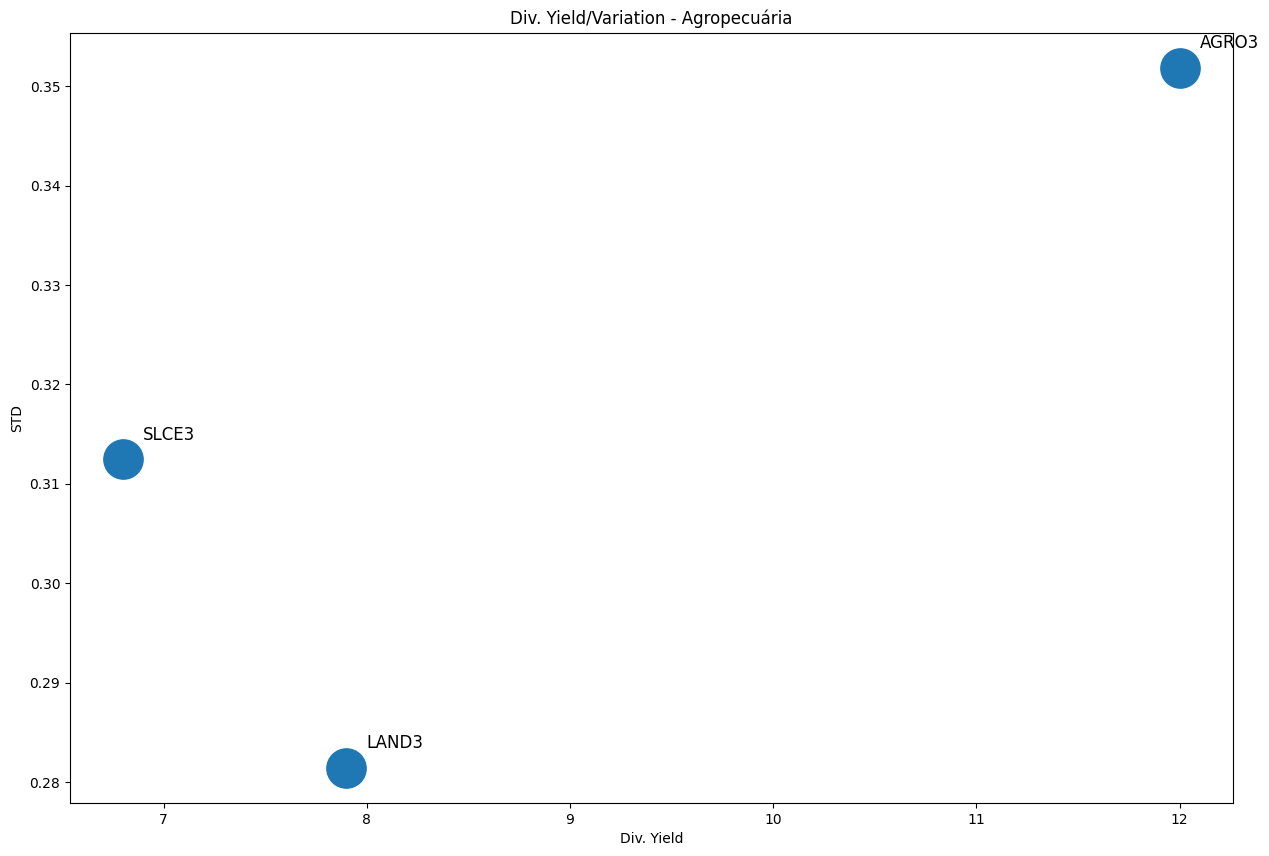

In [72]:
# plot the stocks by sector
financial_data_agro = financial_data[financial_data['Setor'] == 'Agropecuária']

# remove stocks with higher risk, above the mean of std
while(financial_data_agro['nome'].count() > 7):
    financial_data_agro = financial_data_agro[financial_data_agro['std'] < financial_data_agro['std'].mean()]

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(financial_data_agro['Div. Yield'], financial_data_agro['std'], s=800)

plt.xlabel('Div. Yield')
plt.ylabel('STD')
plt.title('Div. Yield/Variation - Agropecuária')

for i in financial_data_agro.index:
    plt.annotate(financial_data_agro.loc[i, 'nome'], xy=(financial_data_agro.loc[i, 'Div. Yield'] + 0.1, financial_data_agro.loc[i, 'std'] + 0.002), size=12)

plt.show()

In [147]:
# create a dataframe with the remaining stocks
financial_data = pd.concat([financial_data_saneamento,financial_data_mineracao,financial_data_papel,financial_data_banco,financial_data_energia, financial_data_agro], ignore_index=True)
financial_data

,nome,Setor,Subsetor,Div. Yield,P/L,yahoo_name,std
0,SAPR4,Água e Saneamento,Água e Saneamento,6.3,5.98,SAPR4.SA,0.256779
1,SAPR3,Água e Saneamento,Água e Saneamento,6.1,5.69,SAPR3.SA,0.278298
2,CSMG3,Água e Saneamento,Água e Saneamento,14.1,6.03,CSMG3.SA,0.365804
3,BRAP4,Mineração,Minerais Metálicos,11.8,4.75,BRAP4.SA,0.315596
4,BRAP3,Mineração,Minerais Metálicos,11.8,4.33,BRAP3.SA,0.322946
5,VALE3,Mineração,Minerais Metálicos,7.9,7.37,VALE3.SA,0.325831
6,CMIN3,Mineração,Minerais Metálicos,8.9,13.94,CMIN3.SA,0.423564
7,EUCA4,Madeira e Papel,Madeira,10.8,5.35,EUCA4.SA,0.490342
8,EUCA3,Madeira e Papel,Madeira,9.6,5.48,EUCA3.SA,0.552546
9,BEES3,Intermediários Financeiros,Bancos,6.6,8.54,BEES3.SA,0.204176


In [148]:
financial_data['symbol'] = financial_data['nome']

# preprocess 'nome' column to remove numerical characters
financial_data['nome'] = financial_data['nome'].str.replace(r'\d+', '', regex=True)

# sort the dataframe by dividend in descending order and std in ascending order
financial_data = financial_data.sort_values(by=['Div. Yield', 'std'], ascending=[False, True])

# group by name and select the first row in each group in order to remove duplicated enterprises
financial_data = financial_data.groupby('nome').first().reset_index()

# sort by relevance
financial_data = financial_data.sort_values(by=['Setor','Subsetor','std','Div. Yield'], ascending=[False,False,True,False])

financial_data

,nome,Setor,Subsetor,Div. Yield,P/L,yahoo_name,std,symbol
11,SAPR,Água e Saneamento,Água e Saneamento,6.3,5.98,SAPR4.SA,0.256779,SAPR4
7,CSMG,Água e Saneamento,Água e Saneamento,14.1,6.03,CSMG3.SA,0.365804,CSMG3
3,BRAP,Mineração,Minerais Metálicos,11.8,4.75,BRAP4.SA,0.315596,BRAP4
15,VALE,Mineração,Minerais Metálicos,7.9,7.37,VALE3.SA,0.325831,VALE3
6,CMIN,Mineração,Minerais Metálicos,8.9,13.94,CMIN3.SA,0.423564,CMIN3
9,EUCA,Madeira e Papel,Madeira,10.8,5.35,EUCA4.SA,0.490342,EUCA4
2,BEES,Intermediários Financeiros,Bancos,6.6,8.54,BEES3.SA,0.204176,BEES3
4,BRSR,Intermediários Financeiros,Bancos,6.6,6.93,BRSR3.SA,0.265884,BRSR3
1,BBDC,Intermediários Financeiros,Bancos,10.1,10.95,BBDC3.SA,0.277255,BBDC3
8,EGIE,Energia Elétrica,Energia Elétrica,6.4,10.97,EGIE3.SA,0.188439,EGIE3


In [149]:
# calculate a inversely proportional percentage of the std
financial_data['percentage'] = 1 / financial_data['std'] * 100
# Normalize the percentages to sum up to 100
financial_data['percentage'] = financial_data['percentage'] / financial_data['percentage'].sum() * 100

In [150]:
# final result
financial_data

,nome,Setor,Subsetor,Div. Yield,P/L,yahoo_name,std,symbol,percentage
11,SAPR,Água e Saneamento,Água e Saneamento,6.3,5.98,SAPR4.SA,0.256779,SAPR4,6.670448
7,CSMG,Água e Saneamento,Água e Saneamento,14.1,6.03,CSMG3.SA,0.365804,CSMG3,4.682381
3,BRAP,Mineração,Minerais Metálicos,11.8,4.75,BRAP4.SA,0.315596,BRAP4,5.427288
15,VALE,Mineração,Minerais Metálicos,7.9,7.37,VALE3.SA,0.325831,VALE3,5.256802
6,CMIN,Mineração,Minerais Metálicos,8.9,13.94,CMIN3.SA,0.423564,CMIN3,4.043852
9,EUCA,Madeira e Papel,Madeira,10.8,5.35,EUCA4.SA,0.490342,EUCA4,3.493134
2,BEES,Intermediários Financeiros,Bancos,6.6,8.54,BEES3.SA,0.204176,BEES3,8.388989
4,BRSR,Intermediários Financeiros,Bancos,6.6,6.93,BRSR3.SA,0.265884,BRSR3,6.442024
1,BBDC,Intermediários Financeiros,Bancos,10.1,10.95,BBDC3.SA,0.277255,BBDC3,6.177813
8,EGIE,Energia Elétrica,Energia Elétrica,6.4,10.97,EGIE3.SA,0.188439,EGIE3,9.089561
